# Activity 5.1: Clustering

### Objective:

This activity aims to perform classification  of unlabeled data using K Means and Agglomerative Clustering

### Intended Learning Outcomes (ILOs):
* Build the model using K Means and Agglomerative clustering.
* Determine the optimum number of clusters using elbow method.
* Visualize the dendogram produced by the agglomerative clustering


### Resources:
* Jupyter Notebook
* Wholesale customers data.csv

### Procedure:

We will used K-Means clustering to cluster the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.


Import the needed libraries

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "2"
os.environ["MKL_NUM_THREADS"] = "2"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans


Load the dataset and check the first five rows

In [4]:
df=pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Check the descriptive statistics of the dataset

In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Since K-Means is a distance-based algorithm, the difference between the magnitudes of the data will create a problem. Let us apply featuring scaling to standardize the data.

In [6]:
# Use standard scaler to standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


Build the K-Means model

In [7]:

# Create cluster of 2
kmeans = KMeans(n_clusters=2, init='k-means++')

# fit the k means algorithm on scaled data
kmeans.fit(data_scaled)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


 Calculate the inertia to evaluate how well the formed clusters are. 

In [9]:
# inertia on the fitted data
kmeans.inertia_

2599.3873849123092

Interpret the result of the inertia

*A high inertia means that the clusters are spread out and are less compact, wherein the data points within a cluster are far from the cluster's centroid. Spread out clusters signify a poor fit or underfitting of the data, meaning that the data points weren't clustered properly.*

Use the elbow curve to determine the optimum number of clusters in Python.



Text(0, 0.5, 'Inertia')

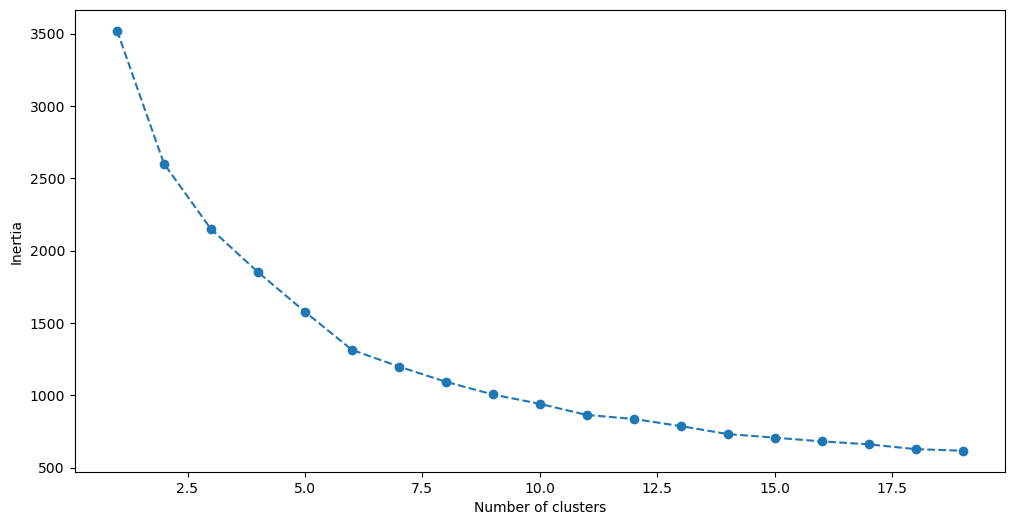

In [10]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Interpret the result of the elbow curve. 

*The elbow curve visualizes the inertia in relation to the number of clusters created. Based on the curve, inertia and the number of clusters have an inverse relationship, meaning that as the number of clusters increase, the inertia decreases. However, the relationship isn't linear. This implies that at a certain point of the curve, increasing the number of clusters only decreases the inertia by a less significant amount. This phenomenon is shown after the number of clusters reach 5.*

Build a model using 5 clusters and k-means ++ initialization

In [11]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [12]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

cluster
1    217
2    133
4     83
0      6
3      1
Name: count, dtype: int64

There are 217 data points belonging to cluster 1 (index 1), then 133 points in cluster 2 (index 2), and so on.

Compute the centroids of the K means cluster

In [47]:
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.69029709 -0.05583432  3.26029996  0.65358702  0.12349121  5.06852754
  -0.27916258  0.82832073]
 [-0.65086946 -0.18394313 -0.36962579 -0.39525877 -0.46444065 -0.16061733
  -0.43005357 -0.20573309]
 [ 1.44865163  0.11429795 -0.30113318  0.73410674  0.95858921 -0.33362606
   1.00812242  0.0776736 ]
 [-0.69029709  0.59066829  1.96681731  5.17550306  1.28721685  6.90059988
  -0.55486198 16.47844745]
 [-0.56144475  0.29467914  1.18952881 -0.25255505 -0.34622781  0.50499351
  -0.46420264  0.15500146]]


What is the purpose of the centroids?

*Centroids are the central points of each cluster, representing the **average** position of all the data points assigned to a cluster.*  

Fit an agglomerative clustering model with two clusters.

In [48]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(data_scaled)
df['agglom'] = ag.fit_predict(data_scaled)

Visualize the dendrogram produced by agglomerative clustering

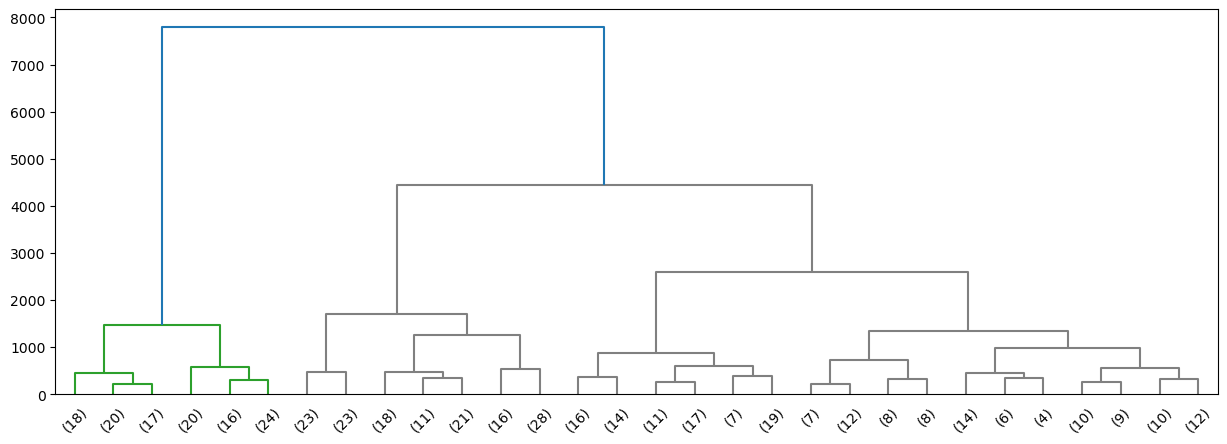

In [49]:
from scipy.cluster import hierarchy
from matplotlib import colors
import seaborn as sns

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

# Some color customization
dark_palette = sns.color_palette()
red = colors.to_hex(dark_palette[2])
blue = colors.to_hex(dark_palette[0])

hierarchy.set_link_color_palette([red, 'gray'])

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color=blue)

Interpret the result of the dendogram

*The way I see it, this visualization is read starting from the bottom.* <br> 
*In the dendogram, the leaves (x-axis) represent the data points or observations. The y-axis represents the **Ward** distance. The horizontal lines signify the "merging" of the data points into a cluster. The vertical lines signify how dissimilar or far apart the clusters are.* <br>
*In this dendogram, it can be seen that the Ward distance rises drastically after a value of around 1600, meaning that the clusters merged at that point are so far apart compared to the other clusters.* 

### Supplementary Activity:


#### Choose your own dataset.


*The dataset chosen was the Indonesian Commuter Dataset.* <Br>
[link to the dataset](https://www.kaggle.com/datasets/rezkyyayang/kepuasanhidupkomuter?select=data_keterangan.csv)

***data_commuter.csv** contains the data, while **data_keterangan.csv** contains what each column means, as well as the possible values.*

#### Import the dataset 


In [78]:
commuter = pd.read_csv('data_commuter.csv')
columns = pd.read_csv('data_keterangan.csv')

In [79]:
commuter.head()

,No. Responden,A.1,A.2,A.3,A.4,A.5,A.6,B.1,B.2,C.1,...,E.3,F.1,F.2,F.3,F.4,F.5,F.6,F.7,F.8,Kepuasan Hidup
0,1,1,30,1,3,1,1,4,4,1,...,5,4,3,4,4,4,3,3,3,Sangat Tidak Puas
1,2,1,40,1,3,1,5,4,5,2,...,4,4,3,4,4,5,4,4,5,Sangat Tidak Puas
2,3,1,38,1,3,1,5,4,4,1,...,5,5,4,4,3,3,3,3,4,Sangat Tidak Puas
3,4,1,27,2,3,1,5,5,4,2,...,4,4,5,5,4,3,4,5,4,Sangat Tidak Puas
4,5,2,28,2,3,1,5,5,5,3,...,4,4,4,5,3,4,5,5,4,Sangat Tidak Puas


In [80]:
columns.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,A,RESPONDENT IDENTITY,ANSWER
2,A.1,Gender,1. Male
3,NaN,NaN,2. Female
4,A.2,Age,Ratio
5,A.3,Marital Status,1. Married
6,NaN,NaN,2. Single
7,NaN,NaN,3. Widower
8,NaN,NaN,4. Widow
9,A.4,Educational Background,1. Primary School


#### Determine the number of datapoints, columns and data types


In [81]:
print("Datapoints (rows):", commuter.shape[0])
print("Columns:", commuter.shape[1])
commuter.dtypes

Datapoints (rows): 384
Columns: 30


No. Responden       int64
A.1                 int64
A.2                 int64
A.3                 int64
A.4                 int64
A.5                 int64
A.6                 int64
B.1                 int64
B.2                 int64
C.1                 int64
C.2                 int64
C.3                 int64
C.4               float64
D.1                 int64
D.2                 int64
D.3                 int64
D.4                 int64
D.5               float64
E.1                 int64
E.2                 int64
E.3                 int64
F.1                 int64
F.2                 int64
F.3                 int64
F.4                 int64
F.5                 int64
F.6                 int64
F.7                 int64
F.8                 int64
Kepuasan Hidup     object
dtype: object

#### Remove unneccesary columns


*Based on the content of **data_keterangan.csv**, only the first and last columns are unnecessary to perform the suceeding tasks relevant to clustering.*

In [38]:
print(list(commuter.columns))

['No. Responden', 'A.1', 'A.2', 'A.3', 'A.4', 'A.5', 'A.6', 'B.1', 'B.2', 'C.1', 'C.2', 'C.3', 'C.4', 'D.1', 'D.2', 'D.3', 'D.4', 'D.5', 'E.1', 'E.2', 'E.3', 'F.1', 'F.2', 'F.3', 'F.4', 'F.5', 'F.6', 'F.7', 'F.8', 'Kepuasan Hidup']


In [39]:
commuter_new = commuter.drop(columns=['No. Responden', 'Kepuasan Hidup'])

In [40]:
commuter_new.head()

,A.1,A.2,A.3,A.4,A.5,A.6,B.1,B.2,C.1,C.2,...,E.2,E.3,F.1,F.2,F.3,F.4,F.5,F.6,F.7,F.8
0,1,30,1,3,1,1,4,4,1,1,...,4,5,4,3,4,4,4,3,3,3
1,1,40,1,3,1,5,4,5,2,2,...,5,4,4,3,4,4,5,4,4,5
2,1,38,1,3,1,5,4,4,1,2,...,4,5,5,4,4,3,3,3,3,4
3,1,27,2,3,1,5,5,4,2,2,...,5,4,4,5,5,4,3,4,5,4
4,2,28,2,3,1,5,5,5,3,2,...,5,4,4,4,5,3,4,5,5,4


#### Do data cleaning such as removing empty values(NaN), replacing missing data .

#####  Check for empty values

In [41]:
commuter.isnull().sum()

No. Responden     0
A.1               0
A.2               0
A.3               0
A.4               0
A.5               0
A.6               0
B.1               0
B.2               0
C.1               0
C.2               0
C.3               0
C.4               0
D.1               0
D.2               0
D.3               0
D.4               0
D.5               0
E.1               0
E.2               0
E.3               0
F.1               0
F.2               0
F.3               0
F.4               0
F.5               0
F.6               0
F.7               0
F.8               0
Kepuasan Hidup    0
dtype: int64

##### Checking outliers

In [58]:
for i, col in enumerate(commuter.columns):
    print(i, col)


0 No. Responden
1 A.1
2 A.2
3 A.3
4 A.4
5 A.5
6 A.6
7 B.1
8 B.2
9 C.1
10 C.2
11 C.3
12 C.4
13 D.1
14 D.2
15 D.3
16 D.4
17 D.5
18 E.1
19 E.2
20 E.3
21 F.1
22 F.2
23 F.3
24 F.4
25 F.5
26 F.6
27 F.7
28 F.8
29 Kepuasan Hidup


*As seen in the boxplot below, there are a significant number of outliers, which can make clustering inefficient. These outliers can be addressed by winsorization, which replaces the extreme values with less extreme ones. In this case, these "less extreme" values are determined by the interqueartile ranges.*

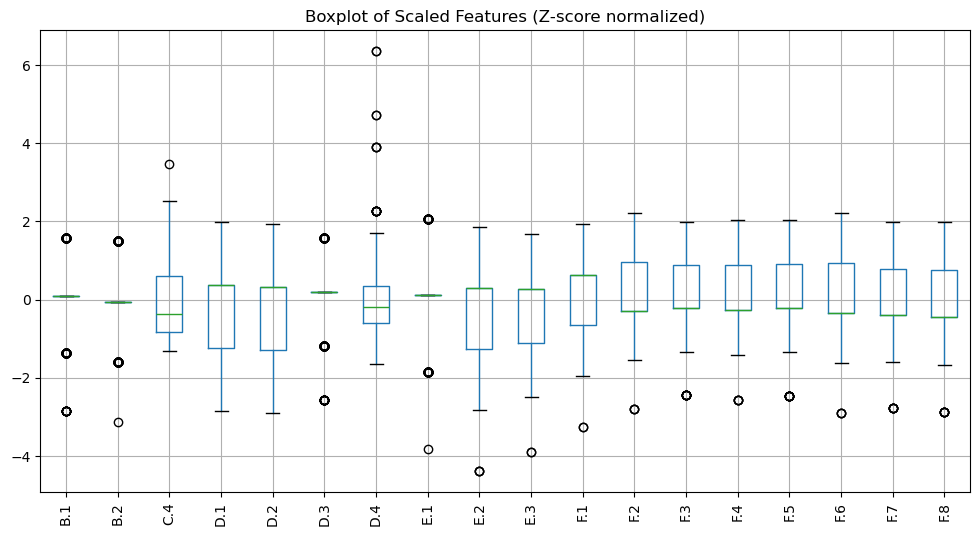

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Exclude columns by index
exclude_idx = [i-1 for i in [1,2,3,4,5,6,7,10,11,12,18,30]]

cols_to_scale = [col for i, col in enumerate(commuter.columns) if i not in exclude_idx]
commuter_scaled = pd.DataFrame(StandardScaler().fit_transform(commuter[cols_to_scale]),
                               columns=cols_to_scale)

plt.figure(figsize=(12, 6))
commuter_scaled.boxplot(rot=90)
plt.title("Boxplot of Scaled Features (Z-score normalized)")
plt.show()



##### Winsorization

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Make a copy of the original DataFrame
commuter_processed = commuter.copy()

# Columns to winsorize
cols_to_winsorize_idx = [7,8,12,13,14,15,16,18,19,20,21,22,23,24,25,26,28]
cols_to_winsorize = [commuter_processed.columns[i] for i in cols_to_winsorize_idx]

#Winsorize each column using Tukey fences + 5th/95th percentile caps
for col in cols_to_winsorize:
    series = commuter_processed[col]
    
    q1, q3 = np.percentile(series.dropna(), [25, 75])
    H = 1.5 * (q3 - q1)
    lower_cap, upper_cap = np.percentile(series.dropna(), [5, 95])
    
    series = series.clip(lower=q1-H, upper=q3+H)
    series[series < (q1-H)] = lower_cap
    series[series > (q3+H)] = upper_cap
    
    commuter_processed[col] = series

##### Scaling via StandardScaler

In [92]:
#Scale the winsorized columns
scaler = StandardScaler()
commuter_scaled = pd.DataFrame(scaler.fit_transform(commuter_processed[cols_to_winsorize]),
                               columns=cols_to_winsorize)

##### Visualizing the changes via boxplot

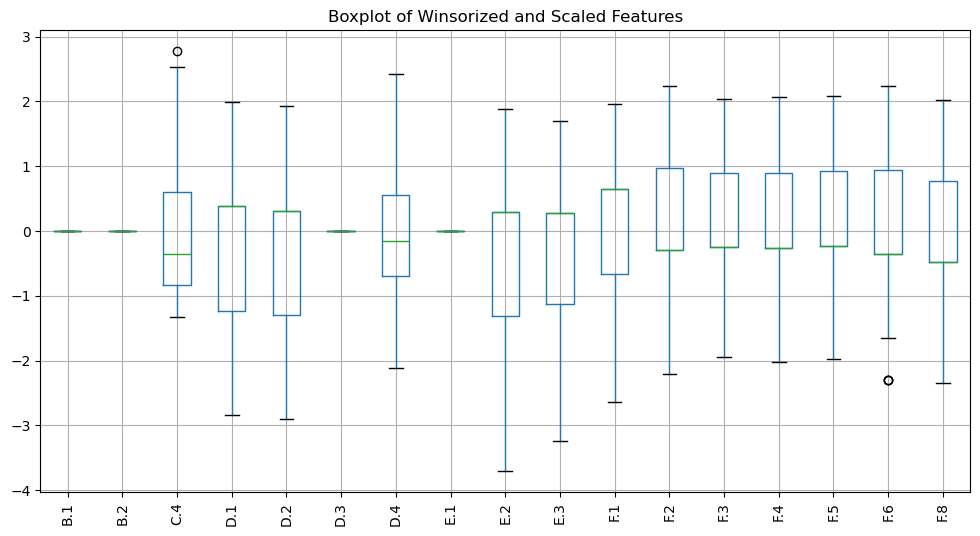

In [93]:
#Boxplot after winsorizing and scaling
plt.figure(figsize=(12, 6))
commuter_scaled.boxplot(rot=90)
plt.title("Boxplot of Winsorized and Scaled Features")
plt.show()

#### Perform descriptive statistics such as mean, median and mode


In [75]:
commuter_scaled.describe()

,B.1,B.2,C.4,D.1,D.2,D.3,D.4,E.1,E.2,E.3,F.1,F.2,F.3,F.4,F.5,F.6,F.8
count,384.0,384.0,3.840000e+02,3.840000e+02,3.840000e+02,384.0,3.840000e+02,384.0,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,384.000000,3.840000e+02,3.840000e+02,384.000000,3.840000e+02
mean,0.0,0.0,-5.551115e-17,-2.127927e-16,-9.251859e-18,0.0,9.251859e-18,0.0,2.266705e-16,2.359224e-16,-9.251859e-18,1.942890e-16,0.000000,2.035409e-16,1.249001e-16,0.000000,1.850372e-16
std,0.0,0.0,1.001305e+00,1.001305e+00,1.001305e+00,0.0,1.001305e+00,0.0,1.001305e+00,1.001305e+00,1.001305e+00,1.001305e+00,1.001305,1.001305e+00,1.001305e+00,1.001305,1.001305e+00
min,0.0,0.0,-1.321629e+00,-2.845266e+00,-2.903498e+00,0.0,-2.115774e+00,0.0,-3.708301e+00,-3.243016e+00,-2.631921e+00,-2.201884e+00,-1.951458,-2.014824e+00,-1.980251e+00,-2.305510,-2.342305e+00
25%,0.0,0.0,-8.396491e-01,-1.231408e+00,-1.294633e+00,0.0,-7.008080e-01,0.0,-1.309669e+00,-1.127526e+00,-6.656608e-01,-2.961211e-01,-0.244488,-2.670249e-01,-2.348423e-01,-0.359761,-4.710599e-01
50%,0.0,0.0,-3.576692e-01,3.824509e-01,3.142314e-01,0.0,-1.565902e-01,0.0,2.894182e-01,2.827998e-01,6.451790e-01,-2.961211e-01,-0.244488,-2.670249e-01,-2.348423e-01,-0.359761,-4.710599e-01
75%,0.0,0.0,6.062905e-01,3.824509e-01,3.142314e-01,0.0,5.508930e-01,0.0,2.894182e-01,2.827998e-01,6.451790e-01,9.743873e-01,0.893492,8.981747e-01,9.287634e-01,0.937405,7.764366e-01
max,0.0,0.0,2.775200e+00,1.996309e+00,1.923096e+00,0.0,2.428445e+00,0.0,1.888506e+00,1.693126e+00,1.956019e+00,2.244896e+00,2.031472,2.063374e+00,2.092369e+00,2.234571,2.023933e+00


#### Use k-means clustering to identify the groups of the dataset.
#### Use 1 to 10 clusters



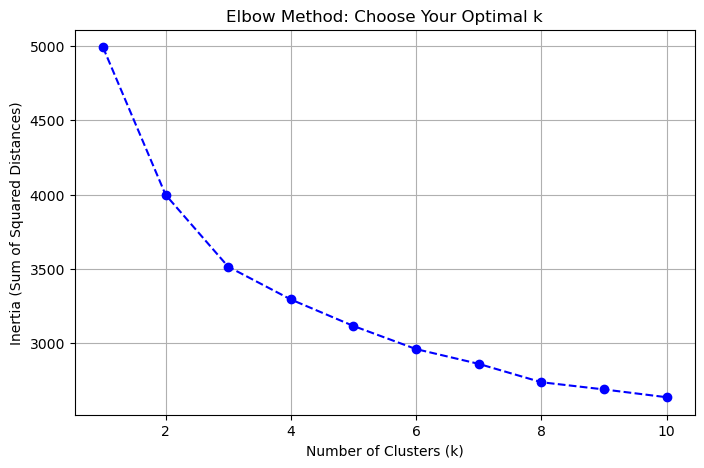


🔹 Number of values per cluster:
k=2: [171 213]


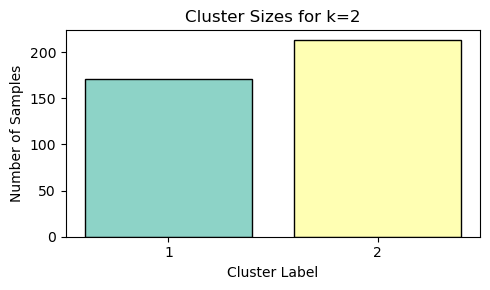

k=3: [124 132 128]


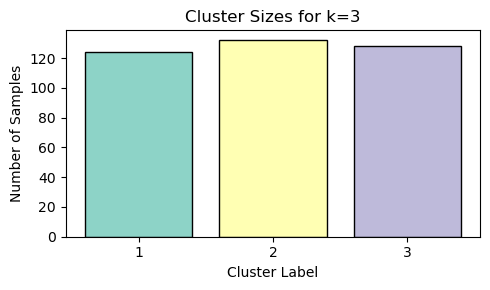

k=4: [105  82 110  87]


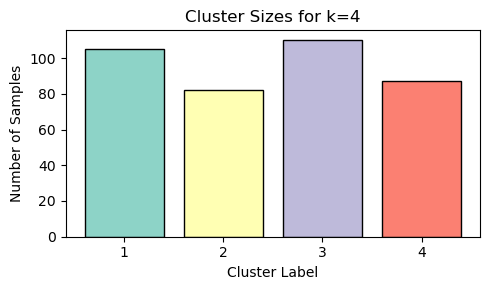

k=5: [ 69  77 115  83  40]


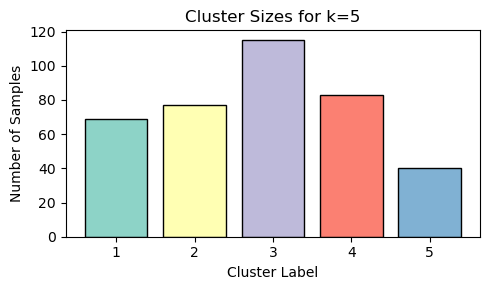

k=6: [54 67 54 62 81 66]


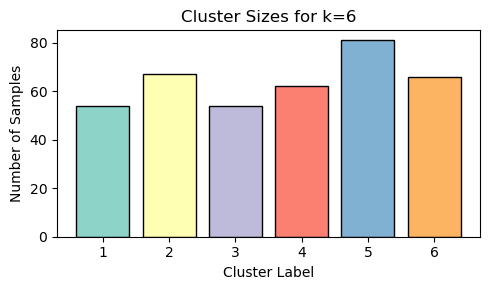

k=7: [36 62 36 46 61 56 87]


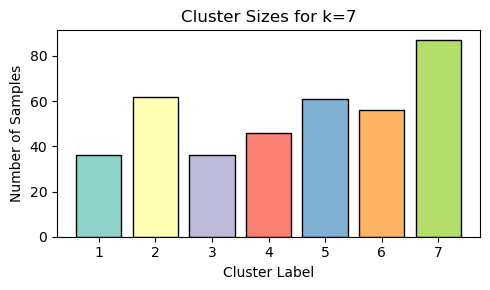

k=8: [42 71 59 39 29 64 46 34]


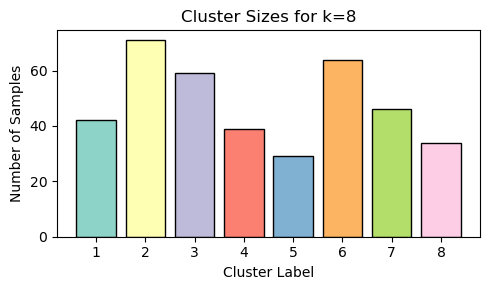

k=9: [63 35 72 41 45 32 34 30 32]


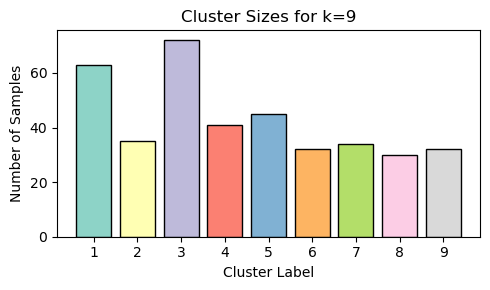

k=10: [32 53 47 39 29 49 46 30 25 34]


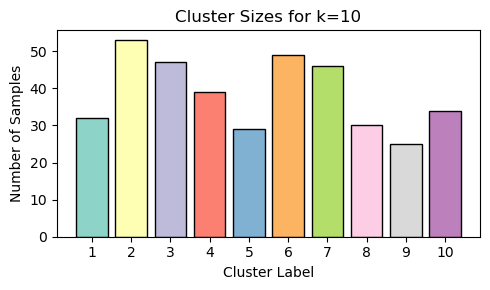

In [94]:
from sklearn.cluster import KMeans
import seaborn as sns
inertias = []
cluster_sizes = {}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(commuter_scaled)
    inertias.append(kmeans.inertia_)
    if k > 1:
        counts = np.bincount(kmeans.labels_)
        cluster_sizes[k] = counts


#Elbow Method Plot

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method: Choose Your Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()


#Display + visualize cluster sizes

print("\n🔹 Number of values per cluster:")
for k, sizes in cluster_sizes.items():
    print(f"k={k}: {sizes}")
    plt.figure(figsize=(5, 3))
    colors = sns.color_palette('Set3', len(sizes))
    plt.bar(range(1, len(sizes)+1), sizes, color=colors, edgecolor='black')
    plt.title(f"Cluster Sizes for k={k}")
    plt.xlabel("Cluster Label")
    plt.ylabel("Number of Samples")
    plt.xticks(range(1, len(sizes)+1))
    plt.tight_layout()
    plt.show()

#### Determine the optimum number of clusters

In [ ]:
##### Using PCA before clustering


#### Use agglomerative clustering and visualize the dendogram


#### Compare the results obtained by the K means and agglomerative clustering.

In [46]:
## type your code here

### Conclusion

Type your answer here

### References

https://www.kaggle.com/code/rezkyyayang/k-means-kepuasan-hidup-komuter